In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
base_dir = '..\\..\\Bases\\'
os.chdir(base_dir)
os.getcwd()

'G:\\Users\\johns\\Desktop\\TCC\\MPAlugueisLisboa\\Bases'

In [3]:
path_final =  'Imoveis\\BaseFinalv2.csv'
df_final = pd.read_csv(path_final, sep=';', decimal=',', encoding='utf-8',quotechar='"')
df_final.head(1)

,RowId,RowId.1,Id_do_imovel,Preco,Valor_Area_util_do_imovel,Numero_Andar_do_imovel,Indicador_de_Elevador,Distrito_do_imovel,Preco_por_metro_quadrado,Latitude_imovel,...,Quantidade_Bancos,Latitude_Municipio,Longitude_Municipio,Endereco_Municipio,Distancia_dirigindo_de_Lisboa_Portugal,Distancia_dirigindo_de_Porto_Portugal,Clima_Ranking,Ranking_Geral,Ranking_Regional,geometry
0,0,0,30365582,400.0,50,0,sem elevador,AVEIRO,8.0,40.837436,...,39,40.640496,-8.653784,"Aveiro, Portugal",218.6,56.6,18,31.0,4,POINT (40.8374358 -8.6551784)


In [4]:
# selecionando o target
target = 'Preco'

# construindo uma lista com os nomes apenas das variáveis categóricas
cat_vars = df_final.select_dtypes(include='object').columns.to_list()
cat_vars.remove('Endereco_Municipio')
cat_vars.remove('geometry')

# lista apenas com os nomes das variáveis numéricas
num_vars = [col for col in df_final.columns if col not in cat_vars + ['Id_do_imovel', target]]
num_vars.remove('RowId.1')
num_vars.remove('RowId')
num_vars.remove('geometry')
num_vars.remove('Endereco_Municipio')


In [5]:
# separando a base em treino e teste
X = df_final.filter(cat_vars + num_vars).copy()
y = df_final['Preco'].copy()

In [12]:
from sklearn.pipeline import Pipeline
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.encoding import OneHotEncoder
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [7]:
# Criando Modelo com Pipelines
data_pipe = Pipeline(steps=[
                ('numeric_imputer', MeanMedianImputer(variables=num_vars, imputation_method='median')),
                ('numeric_scaler', SklearnTransformerWrapper(variables=num_vars, transformer=StandardScaler())),
                ('categoric_imputer', CategoricalImputer(variables=cat_vars, fill_value='missing')),
                ('one_hot_encoder', OneHotEncoder(variables=cat_vars))
])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=30)

In [9]:
data_pipe.fit_transform(X_train).head()

,Valor_Area_util_do_imovel,Numero_Andar_do_imovel,Preco_por_metro_quadrado,Latitude_imovel,Longitude_imovel,Tipo_de_Construcao,Numero_de_Banheiros,Possui_Jardim,Possui_Elevador,Possui_Estacionamento,...,Nome_Cidade_BRAGANCA,Nome_Cidade_AVEIRO,Nome_Cidade_VIANA DO CASTELO,Nome_Cidade_VILA REAL,Nome_Cidade_BEJA,Nome_Cidade_VISEU,Nome_Cidade_LEIRIA,Nome_Cidade_SANTAREM,Nome_Cidade_PORTALEGRE,Nome_Cidade_EVORA
795,-0.441138,0.338139,-1.172257,-1.614779,2.802812,0.071744,-0.760946,2.057467,1.052363,0.341859,...,0,0,0,0,0,0,0,0,0,0
3493,-1.200571,-0.790178,0.735698,-0.472997,-0.787624,0.071744,-0.760946,-0.756087,-1.349250,-0.907356,...,0,0,0,0,0,0,0,0,0,0
5361,-0.034299,-0.790178,0.084853,1.338911,0.392014,0.071744,0.888420,2.057467,1.052363,-0.907356,...,0,0,0,0,0,0,0,0,0,0
5002,0.670889,-0.790178,-0.680973,1.356535,0.263636,0.071744,0.888420,2.057467,1.052363,-0.907356,...,0,0,0,0,0,0,0,0,0,0
5070,-1.010712,-0.790178,0.410771,1.356803,0.254561,0.071744,-0.760946,-0.756087,-1.349250,-0.907356,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data_pipe.transform(X_test).head()

,Valor_Area_util_do_imovel,Numero_Andar_do_imovel,Preco_por_metro_quadrado,Latitude_imovel,Longitude_imovel,Tipo_de_Construcao,Numero_de_Banheiros,Possui_Jardim,Possui_Elevador,Possui_Estacionamento,...,Nome_Cidade_BRAGANCA,Nome_Cidade_AVEIRO,Nome_Cidade_VIANA DO CASTELO,Nome_Cidade_VILA REAL,Nome_Cidade_BEJA,Nome_Cidade_VISEU,Nome_Cidade_LEIRIA,Nome_Cidade_SANTAREM,Nome_Cidade_PORTALEGRE,Nome_Cidade_EVORA
3590,0.914992,-0.790178,1.073780,-0.476379,-0.797714,0.071744,0.888420,-0.756087,-1.349250,-0.907356,...,0,0,0,0,0,0,0,0,0,0
4972,-0.441138,-0.790178,0.168661,1.343856,0.429416,0.071744,0.888420,2.057467,-1.349250,-0.907356,...,0,0,0,0,0,0,0,0,0,0
1790,-0.034299,-0.790178,-0.054826,-0.441933,-0.858983,0.071744,0.888420,-0.756087,-1.349250,-0.907356,...,0,0,0,0,0,0,0,0,0,0
5891,0.779379,-0.226019,-1.067498,-0.615125,-0.163646,0.071744,-0.760946,0.650690,-0.148444,0.341859,...,0,0,0,0,0,0,0,0,0,0
4956,0.914992,-0.226019,-1.339872,1.338729,0.470951,0.071744,0.888420,-0.756087,-0.148444,-0.907356,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# pipeline com os dados e o algoritmo no final!
lr_model_pipe = Pipeline(steps=[
                ('numeric_imputer', MeanMedianImputer(variables=num_vars, imputation_method='median')),
                ('numeric_scaler', SklearnTransformerWrapper(variables=num_vars, transformer=StandardScaler())),
                ('categoric_imputer', CategoricalImputer(variables=cat_vars, fill_value='missing')),
                ('one_hot_encoder', OneHotEncoder(variables=cat_vars)),
                ('algoritmo', LinearRegression())
                #('algoritmo', LogisticRegression(random_state=42))
])

In [ ]:
lr_model_pipe = Pipeline(steps=[
                ('numeric_imputer', MeanMedianImputer(variables=num_vars, imputation_method='median')),
                ('numeric_scaler', SklearnTransformerWrapper(variables=num_vars, transformer=StandardScaler())),
                ('categoric_imputer', CategoricalImputer(variables=cat_vars, fill_value='missing')),
                ('one_hot_encoder', OneHotEncoder(variables=cat_vars)),
                ('algoritmo', LogisticRegression(random_state=42))
])

In [15]:
X_train.head(3)

,Indicador_de_Elevador,Distrito_do_imovel,Tipo_de_Certificacao_Energetica,Nome_Regiao,Nome_Cidade,Valor_Area_util_do_imovel,Numero_Andar_do_imovel,Preco_por_metro_quadrado,Latitude_imovel,Longitude_imovel,...,Percentual_Poder_de_Compra,Percentual_Crimes,Quantidade_Bancos,Latitude_Municipio,Longitude_Municipio,Distancia_dirigindo_de_Lisboa_Portugal,Distancia_dirigindo_de_Porto_Portugal,Clima_Ranking,Ranking_Geral,Ranking_Regional
795,com elevador,FARO,c,Algarve,FARO,75,2,6.666667,37.175697,-7.534910,...,130.6,46.9,29,37.016273,-7.935177,215.5,462.6,22,44.0,2
3493,Não Informado,LISBOA,d,Area Metropolitana de Lisboa,LISBOA,47,0,14.255319,38.714405,-9.156259,...,205.6,49.7,460,38.707751,-9.136592,0.0,274.8,26,1.0,1
5361,com elevador,PORTO,b,Norte,PORTO,90,0,11.666667,41.156199,-8.623565,...,154.0,56.2,184,41.149451,-8.610788,274.8,0.0,15,6.0,2


In [16]:
lr_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('numeric_imputer',
                 MeanMedianImputer(variables=['Valor_Area_util_do_imovel',
                                              'Numero_Andar_do_imovel',
                                              'Preco_por_metro_quadrado',
                                              'Latitude_imovel',
                                              'Longitude_imovel',
                                              'Tipo_de_Construcao',
                                              'Numero_de_Banheiros',
                                              'Possui_Jardim',
                                              'Possui_Elevador',
                                              'Possui_Estacionamento',
                                              'Possui_Piscina',
                                              'Possui_Terraco',
                                              'Numero_de_Quartos',
                                              'Indicador_Anu...
                ('categoric_imputer',
                 CategoricalImputer(fill_value='missing',
                                    variables=['Indicador_de_Elevador',
                                               'Distrito_do_imovel',
                                               'Tipo_de_Certificacao_Energetica',
                                               'Nome_Regiao', 'Nome_Cidade'])),
                ('one_hot_encoder',
                 OneHotEncoder(variables=['Indicador_de_Elevador',
                                          'Distrito_do_imovel',
                                          'Tipo_de_Certificacao_Energetica',
                                          'Nome_Regiao', 'Nome_Cidade'])),
                ('algoritmo', LinearRegression())])

In [17]:
# Avaliando o modelo na base de treino e teste
from sklearn.metrics import accuracy_score

y_pred_train = lr_model_pipe.predict(X_train)
y_pred_test  = lr_model_pipe.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test  = accuracy_score(y_test, y_pred_test)

print(f"Acc de Treino: {acc_train}")
print(f"Acc de Teste: {acc_test}")

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

resultados bem abaixo do esperado com acuracioa de 14% no teste

## Árvore de Decisão

In [50]:
## Árvore de Decisãotree_model_pipe.fit(X_train, y_train)
from sklearn.tree import DecisionTreeClassifier

tree_model_pipe = Pipeline(steps=[
                ('numeric_imputer', MeanMedianImputer(variables=num_vars, imputation_method='median')),
                ('categoric_imputer', CategoricalImputer(variables=cat_vars, fill_value='missing')),
                ('one_hot_encoder', OneHotEncoder(variables=cat_vars)),
                ('algoritmo', DecisionTreeClassifier(random_state=42))
])


In [52]:
tree_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('numeric_imputer',
                 MeanMedianImputer(variables=['Valor_Area_util_do_imovel',
                                              'Numero_Andar_do_imovel',
                                              'Preco_por_metro_quadrado',
                                              'Latitude_imovel',
                                              'Longitude_imovel',
                                              'Tipo_de_Construcao',
                                              'Numero_de_Banheiros',
                                              'Possui_Jardim',
                                              'Possui_Elevador',
                                              'Possui_Estacionamento',
                                              'Possui_Piscina',
                                              'Possui_Terraco',
                                              'Numero_de_Quartos',
                                              'Indicador_Anu...
                 CategoricalImputer(fill_value='missing',
                                    variables=['Indicador_de_Elevador',
                                               'Distrito_do_imovel',
                                               'Tipo_de_Certificacao_Energetica',
                                               'Nome_Regiao', 'Nome_Cidade'])),
                ('one_hot_encoder',
                 OneHotEncoder(variables=['Indicador_de_Elevador',
                                          'Distrito_do_imovel',
                                          'Tipo_de_Certificacao_Energetica',
                                          'Nome_Regiao', 'Nome_Cidade'])),
                ('algoritmo', DecisionTreeClassifier(random_state=42))])

In [53]:
# Avaliando o modelo na base de treino e teste
y_pred_train = tree_model_pipe.predict(X_train)
y_pred_test  = tree_model_pipe.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test  = accuracy_score(y_test, y_pred_test)

print(f"Acc de Treino: {acc_train}")
print(f"Acc de Teste: {acc_test}")

Acc de Treino: 1.0
Acc de Teste: 0.44523246650906223


A regressão logística apesar de ter tido um score menor no treino, ela possui um score melhor no teste e também é mais robusta, ou seja, a sua performance se mantém estável entre treino e teste. Enquanto a árvore de decisão acerta tudo na base de treino e erra bastante na base de teste. Dizemos que a árvore de decisão overfitou (sobreajustou) os dados de treino. É como um estudante que só decorou a resolução da lista de questões que o professor passou para estudar para a prova. Na hora da prova, em que o professor colocou questões novas, o aluno já não se sai tão bem.

## Regressão Linear


In [67]:
# Importar as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [70]:

# Dividir os dados em conjuntos de treinamento e teste
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o pipeline
# Neste exemplo, usaremos o StandardScaler para padronizar os recursos e a Regressão Linear para criar o modelo.
pipeline = Pipeline(steps=[
                ('numeric_imputer', MeanMedianImputer(variables=num_vars, imputation_method='median')),
                ('numeric_scaler', SklearnTransformerWrapper(variables=num_vars, transformer=StandardScaler())),
                ('categoric_imputer', CategoricalImputer(variables=cat_vars, fill_value='missing')),
                ('one_hot_encoder', OneHotEncoder(variables=cat_vars)),
                ('preprocessor', ColumnTransformer(transformers=[('num', StandardScaler(), [0])], remainder='passthrough')),
                ('regressor', LinearRegression())
])


In [77]:
pipeline.transform(X_test).head()

AttributeError: This 'Pipeline' has no attribute 'transform'

In [75]:
# Treinar o modelo usando o pipeline
pipeline.fit(X_train, y_train)

# Fazer previsões usando o modelo treinado
y_pred = pipeline.predict(X_test)



In [76]:
y_train

795      500.0
3493     670.0
5361    1050.0
5002    1000.0
5070     700.0
         ...  
5260    1050.0
500      700.0
3885    1500.0
4517     800.0
5925     430.0
Name: Preco, Length: 5072, dtype: float64

In [72]:
# Imprimir o coeficiente angular e linear
coeficiente_angular = pipeline.named_steps['regressor'].coef_[0]
coeficiente_linear = pipeline.named_steps['regressor'].intercept_

print(f"Coeficiente Angular: {coeficiente_angular}")
print(f"Coeficiente Linear: {coeficiente_linear}")



Coeficiente Angular: 315.3570414203695
Coeficiente Linear: 2026633154672.021


TypeError: unhashable type: 'numpy.ndarray'

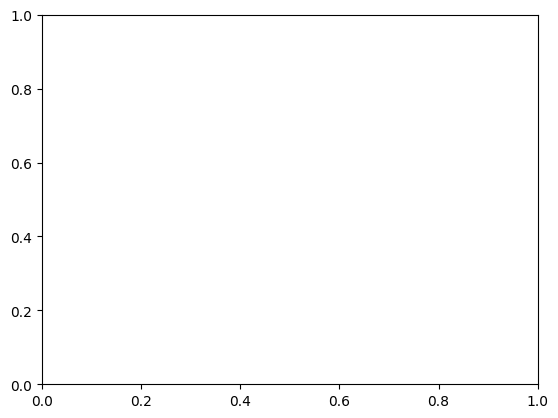

In [73]:
# Plotar os resultados
plt.scatter(X_train, y_train, color='blue', label='Dados de Treinamento')
plt.scatter(X_test, y_test, color='green', label='Dados de Teste')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Regressão Linear usando Pipeline')
plt.show()